# De schakers populatie onder de loep
De data die wij hier voor ons hebben is de KNSB ratinglijst van mei 2020. De vragen die wij aan deze data kunnen stellen is groot, en het leukste is om te kijken naar de dingen die schakers nog niet over zichzelf weten. 

Om de analyses het beste uit te voeren kijken we naar de data van iedereen die een rating heeft. 

In [1]:
#Importeren van de libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#We lezen hier de ratings van de nederlandse spelers in.
ratings = pd.read_csv("2020-05-KNSB.csv", sep=',;',engine='python', header = None)

In [2]:
ratings.head()

,0
0,"8744791;Aafjes, Daan;;NED;1138;84;1973;;"
1,"7998903;Aafjes, Dirk;;NED;1393;100;1962;;"
2,"7107089;Aafjes, Kees;;NED;945;54;1939;Geen (ra..."
3,"8498083;Aafjes, Remi;;NED;1547;100;1997;;"
4,"7609844;Aagaard, Michael;;NED;2030;100;1960;;"


In [3]:
#De file waar we mee beginnen is nog niet echt werkbaar. We hebben nog geen kolomnamen.
ratings = ratings[0].str.split(';')
ratings.head()


0    [8744791, Aafjes, Daan, , NED, 1138, 84, 1973,...
1    [7998903, Aafjes, Dirk, , NED, 1393, 100, 1962...
2    [7107089, Aafjes, Kees, , NED, 945, 54, 1939, ...
3    [8498083, Aafjes, Remi, , NED, 1547, 100, 1997...
4    [7609844, Aagaard, Michael, , NED, 2030, 100, ...
Name: 0, dtype: object

In [4]:
#Eerst maken we een lijst van de lijsten, en dan kan het naar een dataframe. 
ratings = ratings.tolist()
ratings = pd.DataFrame(ratings)
ratings.head()

,0,1,2,3,4,5,6,7,8
0,8744791,"Aafjes, Daan",,NED,1138,84,1973,,
1,7998903,"Aafjes, Dirk",,NED,1393,100,1962,,
2,7107089,"Aafjes, Kees",,NED,945,54,1939,Geen (rating)lid,
3,8498083,"Aafjes, Remi",,NED,1547,100,1997,,
4,7609844,"Aagaard, Michael",,NED,2030,100,1960,,


In [5]:
#Nu wordt het tijd om the checken wat de lege vakken zijn. En of ze wel leeg zijn!
ratings[2].value_counts(dropna=False) #Kolom 2 staat voor titel

      31060
f       213
m       131
g        79
c        41
wm       15
wg        5
Name: 2, dtype: int64

In [6]:
ratings[7].value_counts() #Dit is nog een raadselachtig veld omdat we niet weten waar w voor staat. 

                      17122
Geen (rating)lid      12016
w                      1699
Geen (rating)lid,w      707
Name: 7, dtype: int64

In [7]:
ratings[8].value_counts() #kolom 8 is leeg, dus die mag weg.

    31544
Name: 8, dtype: int64

In [8]:
ratings[5].value_counts() #Dit is voor nu ook een vrij raadselachtige kolom.
#Na wat opzoeken is het het totaal aantal gespeelde patijen, ooit. Waar 100, 100+ is.

100    8690
0      7820
9      5132
70      514
90      431
       ... 
99       36
78       35
98       35
95       33
92       30
Name: 5, Length: 96, dtype: int64

In [9]:
#Even wat namen aan de kolommen geven.
ratings.columns = ['ID','naam','titel','nat.','rating','tot_partijen','geb_jr', 'lid', 'x']
ratings.head()

,ID,naam,titel,nat.,rating,tot_partijen,geb_jr,lid,x
0,8744791,"Aafjes, Daan",,NED,1138,84,1973,,
1,7998903,"Aafjes, Dirk",,NED,1393,100,1962,,
2,7107089,"Aafjes, Kees",,NED,945,54,1939,Geen (rating)lid,
3,8498083,"Aafjes, Remi",,NED,1547,100,1997,,
4,7609844,"Aagaard, Michael",,NED,2030,100,1960,,


In [10]:
ratings[ratings['lid']=='w'].head() #Aha, w staat voor het geslacht. Dit zijn zeker meisjesnamen.

,ID,naam,titel,nat.,rating,tot_partijen,geb_jr,lid,x
12,8738785,"Aalbers, Senne",,NED,,0,2009,w,
17,8876538,"Aalbregt, Liene",,NED,,0,2012,w,
31,8901860,"Aarab, Farah",,NED,,0,2013,w,
38,8900573,"Aardewijn, Dite",,NED,,0,2009,w,
48,8538442,"Aarten, Marjolein",,NED,1414,100,1981,w,


## Schoonmaken
Na het checken van de waarden kan ik met een gerust hart de volgende besluiten maken.
* We droppen kolom x
* We halen de waarden weg voor de mensen die geen partijen hebben gespeeld. 
* Vervolgens checken voor mensen die nog steeds geen rating hebben.

In [11]:
ratings = ratings.drop('x', axis =1)
ratings['tot_partijen'] = ratings['tot_partijen'].astype(int)
ratings = ratings[ratings['tot_partijen'] > 0]
ratings.head()

,ID,naam,titel,nat.,rating,tot_partijen,geb_jr,lid
0,8744791,"Aafjes, Daan",,NED,1138,84,1973,
1,7998903,"Aafjes, Dirk",,NED,1393,100,1962,
2,7107089,"Aafjes, Kees",,NED,945,54,1939,Geen (rating)lid
3,8498083,"Aafjes, Remi",,NED,1547,100,1997,
4,7609844,"Aagaard, Michael",,NED,2030,100,1960,


In [12]:
ratings['rating'].value_counts() #Hieronder zie je, er zijn geen ratinglozen meer!

800     191
1600     67
1546     51
1426     51
1557     51
       ... 
2295      1
853       1
2206      1
2581      1
809       1
Name: rating, Length: 1654, dtype: int64

In [13]:
print(ratings['lid'].value_counts())
print(10751/(10751+11841))
print(426/(426+706))

Geen (rating)lid      11841
                      10751
Geen (rating)lid,w      706
w                       426
Name: lid, dtype: int64
0.4758764164305949
0.3763250883392226


## Geen lid
Zoals we zien zijn er genoeg mensen die nog een rating hebben, maar geen lid meer zijn van de schaakbond. Het is interessant om te zien dat bij de vrouwen met een rating bijna tweederde gestopt is. Terwijl bij de mannen dit aantal dichter bij de 50% ligt.

Verder is het handig om de 'lid en geslacht kolom' te scheiden.

In [14]:
#We maken een nieuwe kolom voor geslacht en definieren een functie daarvoor.
def geslacht(x):
    if x =='Geen (rating)lid,w':
        return 'vrouw'
    elif x == 'w':
        return 'vrouw'
    else:
        return 'man'
ratings['geslacht'] = ratings['lid'].apply(geslacht)
ratings.head()

,ID,naam,titel,nat.,rating,tot_partijen,geb_jr,lid,geslacht
0,8744791,"Aafjes, Daan",,NED,1138,84,1973,,man
1,7998903,"Aafjes, Dirk",,NED,1393,100,1962,,man
2,7107089,"Aafjes, Kees",,NED,945,54,1939,Geen (rating)lid,man
3,8498083,"Aafjes, Remi",,NED,1547,100,1997,,man
4,7609844,"Aagaard, Michael",,NED,2030,100,1960,,man


In [15]:
#nu even de lid kolom opruimen.
ratings['lid'] = ratings['lid'].str.replace('w','').str.replace(',','').str.replace('Geen (rating)lid','0').str.replace('', '1')
ratings['lid'] = ratings['lid'].apply(lambda x: 1 if x=='1' else 0) #De functie hierboven werkte niet ideaal, dus een aanpassing.
ratings.head()

,ID,naam,titel,nat.,rating,tot_partijen,geb_jr,lid,geslacht
0,8744791,"Aafjes, Daan",,NED,1138,84,1973,1,man
1,7998903,"Aafjes, Dirk",,NED,1393,100,1962,1,man
2,7107089,"Aafjes, Kees",,NED,945,54,1939,0,man
3,8498083,"Aafjes, Remi",,NED,1547,100,1997,1,man
4,7609844,"Aagaard, Michael",,NED,2030,100,1960,1,man


In [16]:
#Buitenlanders, ik ben geïnteresseerd in de nederlanders, vandaar dat ik de buitenlanders verwijder.
ratings = ratings[ratings['nat.'] == 'NED']

In [17]:
ratings[ratings['geb_jr'] == ''].index #Bij het converteren naar int liep ik tegen 30 lege waardes aan. Laten we die verwijderen.
ratings = ratings.drop(ratings[ratings['geb_jr'] == ''].index)

In [18]:
#Verder converteren we alle numerieke data naar `int`
ratings['rating'] = ratings['rating'].astype(int)
ratings['tot_partijen'] = ratings['tot_partijen'].astype(int)
ratings['geb_jr'] = ratings['geb_jr'].astype(int)

# Vragen
Of we verder willen met de data zonder de niet-leden of met de niet-leden ligt aan de vragen die we stellen aan de data. 
Hier een aantal vragen die we kunnen stellen mbt lidmaatschap:

- Na hoeveel partijen stopt het gemiddelde niet-lid?
- Wat is de leeftijd van een niet-lid, en zouden ze overleden kunnen zijn?
- Hebben niet-leden een hogere gemiddelde rating dan wel leden?

### Overige vragen
- Wat is de verdeling van de rating van de leden?
- Wat is het leeftijdsverloop van de leden? Leven schakers langer dan gemiddeld?
- Is er een verschil in het leeftijdverloop van de mannen en de vrouwen?
- Wat is de gemiddelde leeftijd van de respectievelijke titelhouders?
- Wat is de gemiddelde rating van de titelhouders?
- Spelen mensen met lage ratings minder partijen?

### Onduidelijkheden
Het is niet duidelijk wanneer de niet-leden worden verwijderd uit de lijst. En óf ze wel worden verwijderd uit de lijst. 
We kunnen daardoor minder vragen beantwoorden over de niet-leden. Vandaar dat ik eerst de vragen over niet-leden beantwoord en vervolgens de data orden.

In [19]:
#We scheiden de datasets in twee nieuwe variabelen.
leden = ratings[ratings['lid']==1]
niet_leden = ratings[ratings['lid']==0]

In [20]:
niet_leden['tot_partijen'].mean()

35.26918771985929

In [21]:
leden['tot_partijen'].mean()

80.73707257989379

Het resultaat is vrij significant, de schakers die geen lid meer zijn hebben veel minder partijen gespeeld dan de wel leden. Daarbij moet men ook nog bedenken dat 100 eigenlijk 100+ is. Dus de niet leden hebben niet veel partijen gespeeld terwijl ze actief waren.

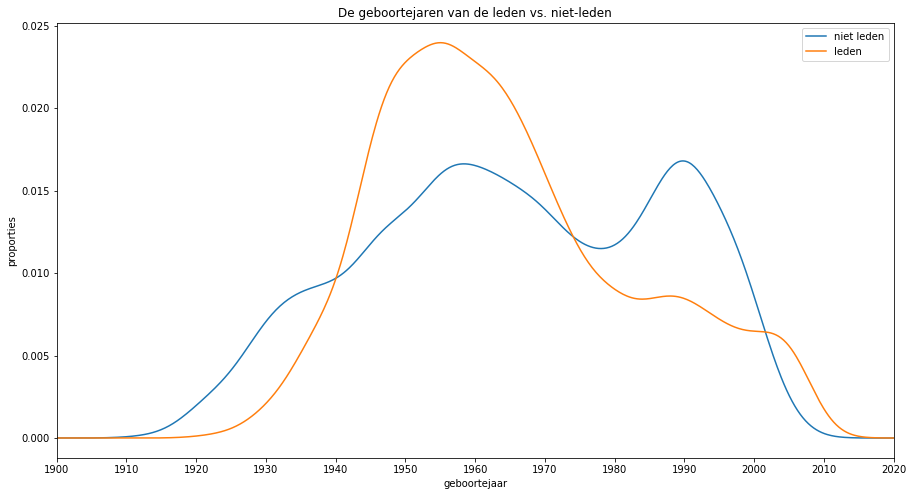

In [22]:
import seaborn as sns
%matplotlib inline
niet_leden['geb_jr'].plot.kde(figsize = (15,8), label='niet leden')
leden['geb_jr'].plot.kde(label='leden')
plt.legend()
plt.title(label='De geboortejaren van de leden vs. niet-leden')
plt.ylabel('proporties')
plt.xlabel('geboortejaar')
plt.xlim(1900,2020)
plt.xticks([1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])
plt.show()

## Overleden niet-leden en gestopte millenials
Als er iets duidelijk is is dat de niet-leden 10 tot 15 jaar ouder zijn dan de leden, ik vermoed dat de oorzaak daarvan is dat op een bepaalde leeftijd schaken niet meer mogelijk is en dat men dan niet meer lid blijft van de club en de schaakbond. Daarna controleert de schaakbond niet of de oud-ratinghouders overleden zijn. Er staan namelijk nog steeds mensen in met het geboortejaar onder 1910!

Daarna zien we een grote piek in leden met het geboortejaar tussen 1947 en 1965. Deze generatie heeft nog steeds meer leden dan niet-leden in de ratinglijst. 

Wat verder opvalt is de meest rechtse blauwe piek rond 1989/1990. Daar is een grote groep lid geweest van de schaakbond, maar ook opgehouden. Er is iets gebeurd waardoor deze 'millenials' voor een groot aantal gestopt zijn. Verder zien we ook dat het ledenaantal met een rating steeds verder afneemt. Op het einde lijkt het alsof er wellicht 5 jarige kinderen zijn met een rating, maar dat is een kleine fout van de grafiek om mooi te blijven tekenen. Om dit en andere zaken beter te laten zien rekenen we verder in procenten.

In [23]:
import warnings
warnings.filterwarnings('ignore')


#Ik wil graag de frequenties per decennium laten zien. 
#Daarvoor rond ik de jaren eerst even af door het laatste cijfer te vervangen door een 0
niet_leden['geb_dec'] = (niet_leden['geb_jr'].astype(str).str[:3].astype(int)*10).copy()
leden['geb_dec'] = (leden['geb_jr'].astype(str).str[:3].astype(int)*10).copy()

In [24]:
#Hieronder de geboortepercentages van de niet-leden. Let op 1960 = 1960-1970 etc.
niet_leden['geb_dec'].value_counts(normalize=True).sort_index()*100

1910     0.367765
1920     3.933483
1930     8.954269
1940    11.400704
1950    15.677966
1960    15.733930
1970    11.984330
1980    13.999041
1990    15.070355
2000     2.878158
Name: geb_dec, dtype: float64

In [25]:
#en de percentages van de leden. Let op 1960 = 1960-1970 etc.
leden['geb_dec'].value_counts(normalize=True).sort_index()*100

1920     0.540389
1930     4.788969
1940    16.817292
1950    23.777136
1960    20.711823
1970    11.823349
1980     8.478524
1990     7.407062
2000     5.562285
2010     0.093171
Name: geb_dec, dtype: float64

In [26]:
#Tot slot, laten we inzoomen op de mannen van 1920 tot 1940
leden[leden['geslacht']=='man']['geb_dec'].value_counts().sort_index()

1920      56
1930     498
1940    1779
1950    2510
1960    2154
1970    1227
1980     871
1990     741
2000     508
2010       7
Name: geb_dec, dtype: int64

In [27]:
#Laten we nu de gemiddelde rating vergelijken van de leden en niet-leden.
print(niet_leden['rating'].mean())
leden['rating'].mean()

1495.2655900223856


1626.8033168731947

De gemiddelde rating van het niet-lid ligt 130 punten lager. Dat is begrijpelijk, want de sterkste spelers blijven meestal lid!

## Ouder door schaken?
Vanuit de tabellen kunnen we meten hoeveel mensen er tussen de 80 en ouder zijn. Wie weet wordt men van schaken wel ouder! 
[hier](https://www.cbs.nl/nl-nl/achtergrond/2018/35/mannen-en-vrouwen-per-leeftijdsgroep) kunnen we zien dat er in 2018 295,473 mannen ouder waren dan 80. Van de in totaal 8,5 miljoen mannen. In onze leden data zien we dat er 572 leden 80+ zijn. Dat is ongeveer 5.5% van alle mannelijke schakers.

Laten we nu met deze cijfers rekenen wat de verhoudingen zijn. Uiteindelijk kunnen we natuurlijk nooit met zekerheid zeggen of schakers ouder worden, maar we kunnen wel zeggen dat er verhoudingsgewijs meer schakers van 80+ een rating hebben dan in de bevolking. Het verschil is ongeveer 2% zoals we hieronder kunnen zien. Echter dit kan ook veroorzaakt worden doordat er minder jonge mensen schaken. Uiteindelijk is het aantal schakers van 80+ maar 0.2% van de mannen van 80+. 

In [28]:
#Laten we de ratio's vergelijken
schaker_man = len(leden[leden['geslacht']=='man'])
man_80_plus = 295473
man_nl = 8500000
schaker_80_plus = 572

print("man 80+",man_80_plus/man_nl*100, '%')
print("man, schaker 80+",schaker_80_plus/schaker_man*100, '%')

man 80+ 3.4761529411764704 %
man, schaker 80+ 5.526036131774708 %


In [29]:
#en nu de verhoudingen kruisgewijs
print("schakers 80+/man bevolking 80+",schaker_80_plus/man_80_plus*100, '%')
print("schakers man/bevolking man", schaker_man/man_nl*100,'%')

schakers 80+/man bevolking 80+ 0.19358790820142618 %
schakers man/bevolking man 0.12177647058823529 %


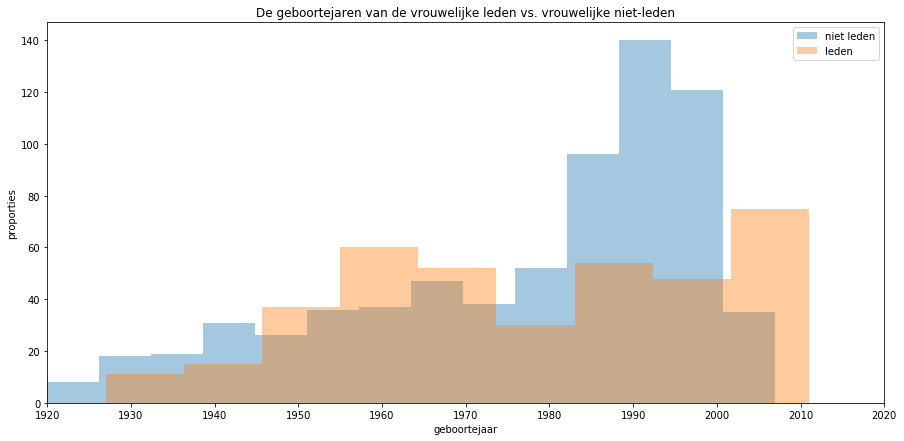

In [30]:
#het laatste wat we kunnen bekijken van de niet leden en de leden is de leeftijden van de vrouwelijke leden.
%matplotlib inline
niet_leden_vrouw = niet_leden[niet_leden['geslacht']=='vrouw']
leden_vrouw = leden[leden['geslacht']=='vrouw']

fig, ax = plt.subplots(figsize =(15,7))

sns.distplot(niet_leden_vrouw['geb_jr'],kde=False, label='niet leden')
sns.distplot(leden_vrouw['geb_jr'],kde=False,label='leden')

plt.legend()
plt.title(label='De geboortejaren van de vrouwelijke leden vs. vrouwelijke niet-leden')
plt.ylabel('proporties')
plt.xlabel('geboortejaar')
plt.xlim(1920,2020)
plt.xticks([1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])
plt.show()

## Millennial vrouwen stoppen
We zien hier ook dat bij de millennials de vrouwen voor een groot deel gestopt zijn. Sterker nog, dit deel is verhoudingsgewijs nog een stuk groter. Verder zien we wel dat de aantallen jonge vrouwen erg groot is in de vrouwelijke ledenpopulatie. Verhoudingsgewijs is dit veel hoger dan bij de mannen. Wat ook wederom laat zien dat vrouwen na hun 20e vaak stoppen.

## Mannen vs. Vrouwen
Een veel gehoord argument waarom vrouwen lagere ratings hebben dan mannen is dat er nu eenmaal minder vrouwen beginnen met schaken. Wat dat betreft hebben ze dus een kleinere kans om het ver te schoppen. Een interessant experiment is om willekeurige groepen mannen uit de data te nemen, en te kijken of ze gemiddeld een hogere rating hebben. Daarbij neem ik:
* Alleen de leden
* 100 willekeurige groepen mannelijke leden

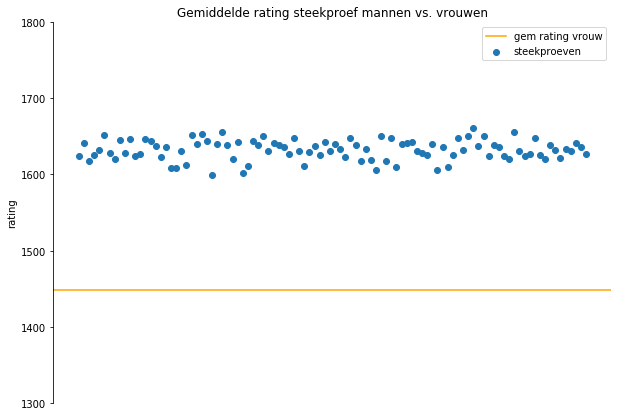

In [31]:
#Hierboven hebben we al een variabele gemaakt leden_vrouw. Laten we dat ook doen voor leden_man.
leden_man = leden[leden['geslacht']=='man']
gem_rating_vrouw = leden_vrouw['rating'].mean()

#Nu genereren we 100 verschillende groepen voor de mannen
gem_waarden = []
for i in range(100):
    steekproef = leden_man.sample(len(leden_vrouw), random_state = i)
    gem = steekproef['rating'].sum()/len(steekproef)
    gem_waarden.append(gem)
    
plt.figure(figsize=(10,7))
plt.scatter(range(100),y=gem_waarden, label = 'steekproeven')
plt.title('Gemiddelde rating steekproef mannen vs. vrouwen')
plt.axhline(gem_rating_vrouw, c='orange', label='gem rating vrouw')
plt.ylabel('rating')
sns.despine(bottom='True')
plt.xticks([])
plt.ylim((1300,1800))
plt.legend()
plt.show()

Op dit plaatje zien we dat alle steekproeven van willekeurige mannen uit de ratinglijst een hoger gemiddelde hebben dan de gemiddelde rating van de vrouwen. Dit is opzich niet zo een vreemd resultaat als je bedenkt dat de steekproefgrootte van 428 vrij groot is, wat er voor zorgt dat de steekproeven relatief dichtbij het ware gemiddelde blijven. 

Zo zou je kunnen redeneren dat de vrouwen ook een deel van de ratinglijst zijn. En dat het gemiddelde dus significant afwijkt voor de groepsgrootte. Het argument dat er te weinig vrouwen zijn die schaken om de absolute top te kunnen bereiken houdt dus geen stand. 

## Hoe vergaat het de titelhouders?

In [32]:
#Hier maken we een tabel voor de gemiddelden voor de waarden van de titelhouders en niet titelhouders.
gem_rating_titel = pd.pivot_table(leden,'rating','titel')
gem_rating_titel

,rating
titel,
,1608.257709
c,2133.466667
f,2243.021277
g,2530.125000
m,2365.441558
wg,2269.666667
wm,2108.875000


### Gemiddelde rating titelhouders
De gemiddelde rating van de niet-titelhouder is 1608, een normaal getal nog steeds. Opvallend om te zien is dat er maar een titel is met een gemiddelde hoger dan de streefrating voor het behalen van de titel. De grootmeester. Ergens is dat ook wel logisch omdat als een meester hoog boven het gemiddelde zit dat hij dan nog grootmeester kan worden. 

Nog iets dat opvalt is dat hoe lager de titel hoe verder de gemiddelde rating onder de streefrating ligt. 
voor CM is dat 2200, FM 2300, IM 2400. ("Gelukkig zit ik met 2382 boven het gemiddelde van de IM's)

Voor de vrouwelijke titels zien we een gemiddelde val van 90 punten onder de streefratings van WGM:2350 en WIM:2200
Voor de vrouwen is dit getal minder representatief, er zijn bijvoorbeeld maar twee WIM's nog lid.

### Leeftijden van de titelhouders

In [33]:
gem_leeftijd_titel = pd.pivot_table(leden,'geb_jr','titel')
gem_leeftijd_titel

,geb_jr
titel,
,1964.215380
c,1977.600000
f,1976.638298
g,1979.843750
m,1975.194805
wg,1983.000000
wm,1976.625000


We zien hier dat de gemiddelde titelhouder ongeveer 13 jaar jonger is dan het gemiddelde lid. De grootmeesters, zowel bij de dames als de heren zijn het jongst! De mannelijke IM's zijn gemiddeld het oudste van alle titelhouders.

## Ratings algemeen
Hoe is de rating verdeeld? Laten we dat eens visualiseren.

(700, 2800)

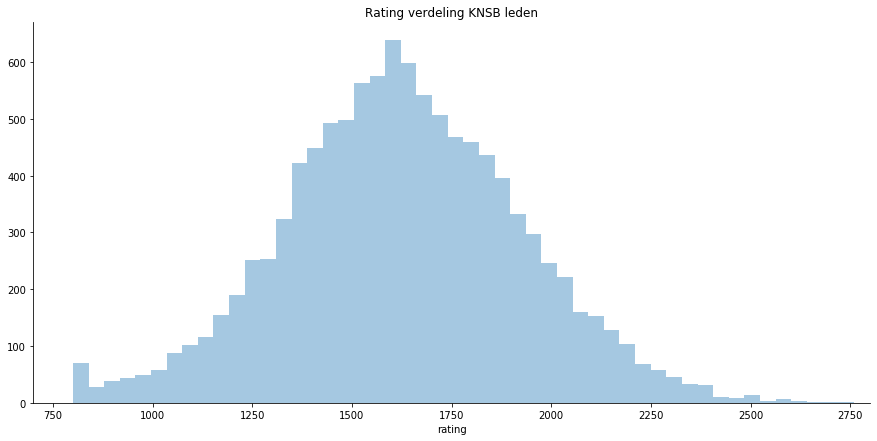

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(leden['rating'],kde=False, norm_hist=False).set_title('Rating verdeling KNSB leden')
sns.despine()
plt.xlim(700,2800)

Als het woord "Bell curve" nu niks betekent voor je dan weet ik het ook niet meer. Ding-dong! Dit is ook niet zo vreemd, want het hele rating systeem is gemaakt om de schaker in te delen op een normaal verdeelde schaal. 

## Leeftijd en rating
Tot slot kunnen we kijken naar het verband tussen leeftijd en rating. Iedereen weet dat je achteruit gaat als je ouder wordt, maar hoe veel is dat gemiddeld?!

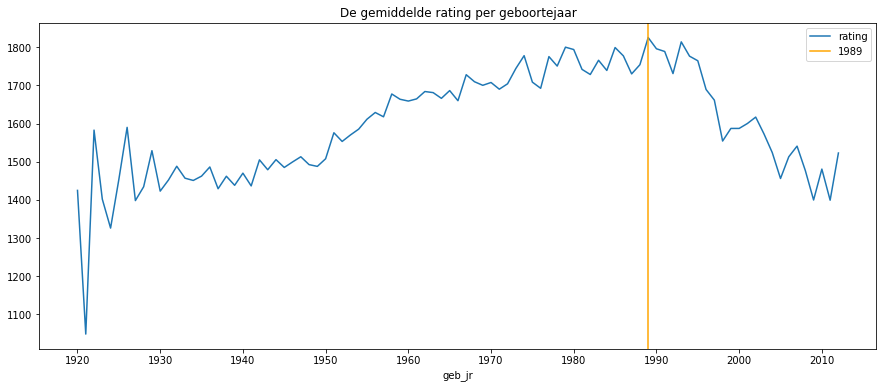

In [55]:
#Dit zijn de ratings per uniek geboortejaar
pd.pivot_table(leden, 'rating','geb_jr').plot(figsize=(15,6),title='De gemiddelde rating per geboortejaar')
plt.xticks(range(1920,2020,10))
plt.axvline(1989, color='orange',label=1989)
plt.legend()
plt.show()

Met de verticale lijn is het jaar 1989 aangegeven. Het jaar dat gemiddeld de hoogste rating heeft van alle jaren op dit moment. Een paar dingen die opvallen:
* Rating gaat harder omlaag na je 62e verjaardag. 
* Na een leeftijd van 70 gaat het gemiddelde niet meer veel verder achteruit.
* Na 1996 is de gemiddelde rating van de nederlandse schakers hard omlaag gegaan. Wat wil zeggen dat de jeugd gemiddeld minder tijd investeert in het trainen van schaken. Een zorgelijke ontwikkeliking als je beseft dat zij de ambassadeurs van de sport moten worden.

Wel interessant dat de achteruitgang van de jeugd direct gelinkt is aan de jaren dat de computer zijn opmars begon te maken en dat gamen leuker begint te worden. Al is dat slechts een mogelijke oorzaak. 